# 将图像赋值到训练、验证和测试的目录

In [1]:
import os
import shutil

In [4]:
# 原始数据集解压目录路径

In [35]:
original_dataset_dir = r'E:\Data\dogs-vs-cats\train'

In [8]:
# 保存较小数据集的目录

In [13]:
base_dir = r'E:\Data\dogs-vs-cats_small'
os.mkdir(base_dir)

In [10]:
# 划分后的训练、验证和测试集目录

In [14]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

In [15]:
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

In [16]:
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [17]:
# 猫的训练图像目录

In [33]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

In [19]:
# 狗的训练图像目录

In [20]:
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

In [21]:
# 猫的验证图像目录

In [22]:
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

In [26]:
# 狗的验证图像目录

In [24]:
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

In [25]:
# 猫的测试图像目录

In [27]:
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

In [28]:
# 狗的测试图像目录

In [30]:
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [31]:
# 将前1000张猫的图像复制到train_cats_dir

In [36]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]  # 生成文件名
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src=src, dst=dst)  # 从源src复制到dst中去

In [38]:
# 将接下来500张猫的图像复制到validation_cats_dir

In [39]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src=src, dst=dst)

In [40]:
# 将接下来的500张猫的图像复制到test_cats_dir

In [42]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src=src, dst=dst)

In [43]:
# 将前1000张狗的图像复制到train_dogs_dir

In [44]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src=src, dst=dst)

In [45]:
# 将接下来500张狗的图像复制到validation_cats_dir

In [48]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src=src, dst=dst)

In [47]:
# 将接下来的500张狗的图像复制到test_cats_dir

In [49]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src=src, dst=dst)

In [50]:
# 查看每个分组（训练/验证/测试）中分别包含多少张图像

In [54]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


# 构建网络

In [55]:
from keras import layers
from keras import models

In [58]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))

In [59]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

# 配置模型

In [60]:
from keras import optimizers

In [61]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])  # acc为分类精度

# 数据预处理

In [62]:
from keras.preprocessing.image import ImageDataGenerator

In [63]:
# 将所有融入想乘以1/255缩放

In [64]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [65]:
train_generator = train_datagen.flow_from_directory(directory=train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.


In [66]:
validation_generator = test_datagen.flow_from_directory(directory=validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 1000 images belonging to 2 classes.


In [67]:
# 理解Python生成器

In [68]:
def generator():
    i = 0
    while True:
        i += 1
        yield i

In [69]:
for item in generator():
    print(item)
    if item > 4:
        break

1
2
3
4
5


In [71]:
# 生成了150*150的RGB图像与二进制标签组成的批量

In [70]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


# 利用批量生成器拟合模型

In [72]:
history = model.fit_generator(generator=train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)

Epoch 1/30
100/100 [==============================] - 134s - loss: 0.6914 - acc: 0.5315 - val_loss: 0.6740 - val_acc: 0.6190
Epoch 2/30
100/100 [==============================] - 135s - loss: 0.6583 - acc: 0.6065 - val_loss: 0.6453 - val_acc: 0.6280
Epoch 3/30
100/100 [==============================] - 130s - loss: 0.6147 - acc: 0.6715 - val_loss: 0.6016 - val_acc: 0.6800
Epoch 4/30
100/100 [==============================] - 126s - loss: 0.5600 - acc: 0.7050 - val_loss: 0.6392 - val_acc: 0.6340
Epoch 5/30
100/100 [==============================] - 113s - loss: 0.5391 - acc: 0.7300 - val_loss: 0.5810 - val_acc: 0.6960
Epoch 6/30
100/100 [==============================] - 113s - loss: 0.4969 - acc: 0.7540 - val_loss: 0.6158 - val_acc: 0.6670
Epoch 7/30
100/100 [==============================] - 111s - loss: 0.4778 - acc: 0.7695 - val_loss: 0.5360 - val_acc: 0.7430
Epoch 8/30
100/100 [==============================] - 112s - loss: 0.4376 - acc: 0.7980 - val_loss: 0.5822 - val_acc: 0.7160


# 训练完成后保存训练模型

In [73]:
model.save('cats_and_dogs_small_1.h5')

# 绘制训练过程中的损失曲线和精度曲线

In [74]:
import matplotlib.pyplot as plt

In [75]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [78]:
epochs = range(1, len(acc) + 1)

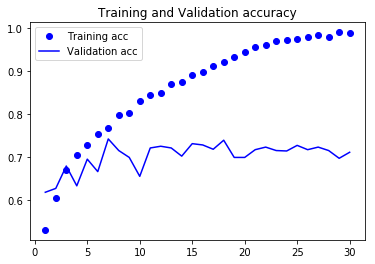

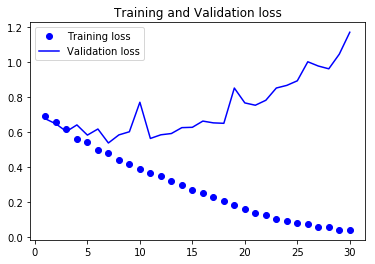

In [82]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

# 使用数据增强

In [83]:
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
                            shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

# 显示几个随机增强后的训练图像

In [84]:
from keras.preprocessing import image

In [85]:
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

In [88]:
img_path = fnames[3]

In [89]:
img_path

'E:\\Data\\dogs-vs-cats_small\\train\\cats\\cat.100.jpg'

In [92]:
# 读取图像并调整大小

In [90]:
img = image.load_img(path=img_path, target_size=(150, 150))

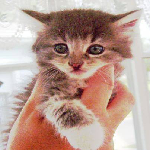

In [91]:
img

In [93]:
# 将图像转换为形状(150, 150, 3)的NumPy数组

In [94]:
x = image.img_to_array(img=img)

In [96]:
# 将其形状改变为(1, 150, 150, 3)

In [97]:
x = x.reshape((1, ) + x.shape)

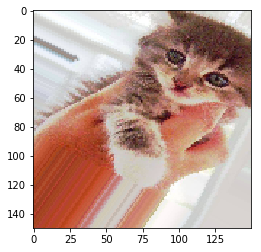

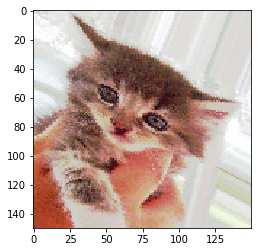

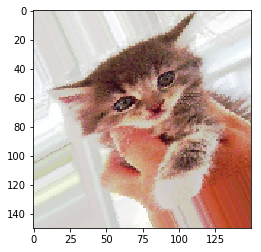

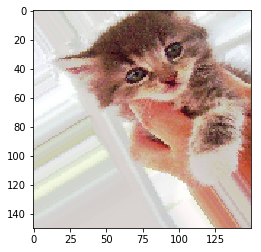

In [99]:
i = 0
for batch in datagen.flow(x=x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(X=image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

# 定义一个包含dropout的新卷积神经网络

In [100]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))

In [101]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [102]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

# 利用数据增强生成器训练卷积神经网络

In [106]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [107]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [108]:
train_generator = train_datagen.flow_from_directory(directory=train_dir, target_size=(150,150), batch_size=32, class_mode='binary')

Found 2000 images belonging to 2 classes.


In [109]:
validation_generator = test_datagen.flow_from_directory(directory=validation_dir, target_size=(150, 150), batch_size=32, class_mode='binary')

Found 1000 images belonging to 2 classes.


In [110]:
history = model.fit_generator(generator=train_generator, steps_per_epoch=100, epochs=100, validation_data=validation_generator, validation_steps=50)

Epoch 1/100
100/100 [==============================] - 205s - loss: 0.6943 - acc: 0.5181 - val_loss: 0.6907 - val_acc: 0.5082
Epoch 2/100
100/100 [==============================] - 190s - loss: 0.6804 - acc: 0.5653 - val_loss: 0.7059 - val_acc: 0.5052
Epoch 3/100
100/100 [==============================] - 199s - loss: 0.6689 - acc: 0.5859 - val_loss: 0.6508 - val_acc: 0.6153
Epoch 4/100
100/100 [==============================] - 196s - loss: 0.6608 - acc: 0.5919 - val_loss: 0.6459 - val_acc: 0.6179
Epoch 5/100
100/100 [==============================] - 197s - loss: 0.6436 - acc: 0.6169 - val_loss: 0.6087 - val_acc: 0.6720
Epoch 6/100
100/100 [==============================] - 184s - loss: 0.6280 - acc: 0.6403 - val_loss: 0.6118 - val_acc: 0.6478
Epoch 7/100
100/100 [==============================] - 184s - loss: 0.6027 - acc: 0.6616 - val_loss: 0.5727 - val_acc: 0.7030
Epoch 8/100
100/100 [==============================] - 193s - loss: 0.6011 - acc: 0.6678 - val_loss: 0.5568 - val_acc:

# 保存模型

In [111]:
model.save('cats_and_dogs_small_2.h5')

# 绘制训练过程中的损失曲线和精度曲线

In [112]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [115]:
epochs = range(len(acc))  # 得到了100个acc

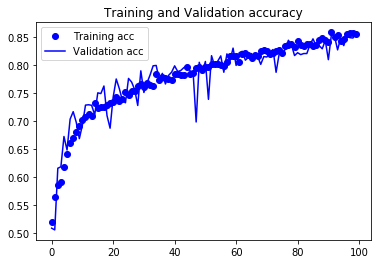

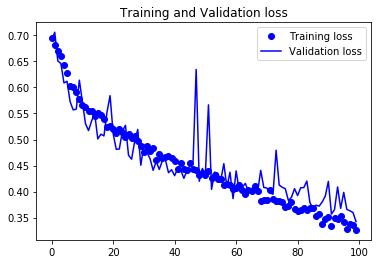

In [117]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()  # 定义一个图像窗口
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [122]:
# 此时验证集的精度为82%，由于训练数据太小，很难进一步提高精度，所以下一步我们将使用预训练网络